In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Plots per step

,epoch,batch,loss,mae,mse,energy_loss


/home/alvarovh/.conda/envs/climsim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/alvarovh/.conda/envs/climsim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


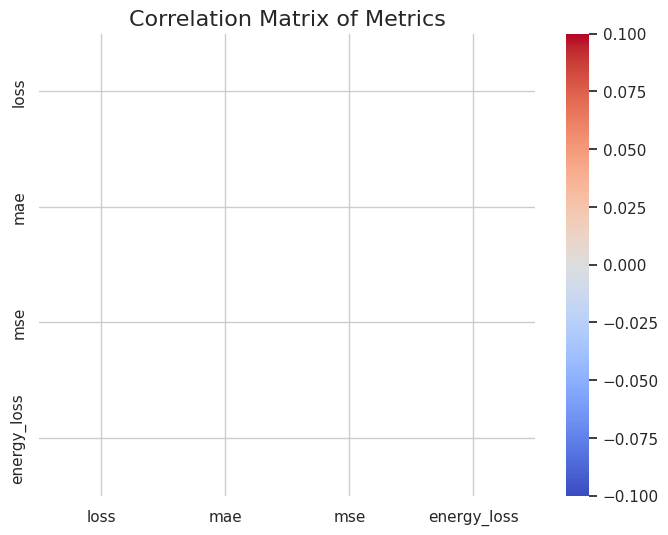

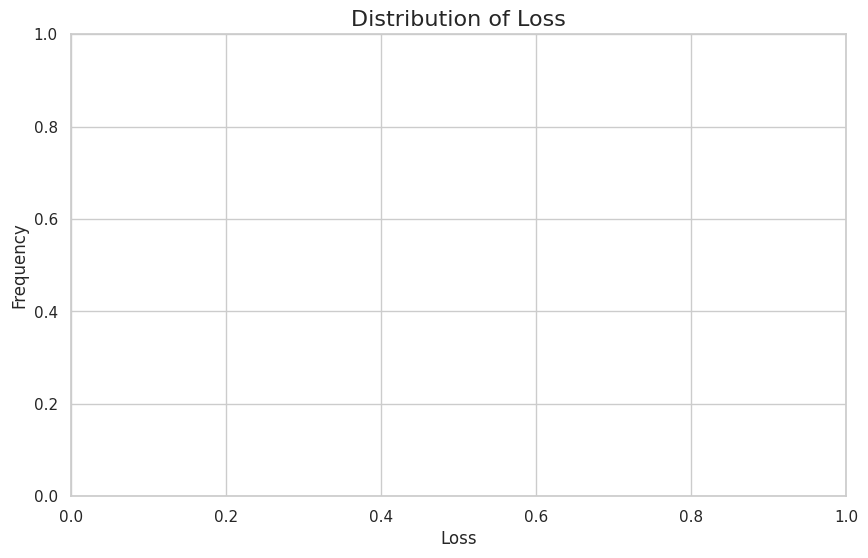

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/batch_train_log_lambda_0.5_datafrac_0.001.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_train_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.0_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.5_datafrac_0.1.csv"
filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.01/batch_train_log_lambda_0.1_datafrac_0.01.csv"

data = pd.read_csv(filepath)

# Check the first few rows of the dataset
display(data.head())

# Set the style for the plots
sns.set(style="whitegrid")


# Heatmap to visualize the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[["loss", "mae", "mse", "energy_loss"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics", fontsize=16)
plt.show()

# Histogram of Loss values
plt.figure(figsize=(10, 6))
sns.histplot(data["loss"], kde=True, color="blue", bins=20)
plt.title("Distribution of Loss", fontsize=16)
plt.xlabel("Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [19]:
data=data[data["mae"]<200]

/tmp/ipykernel_4071609/3900958726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']


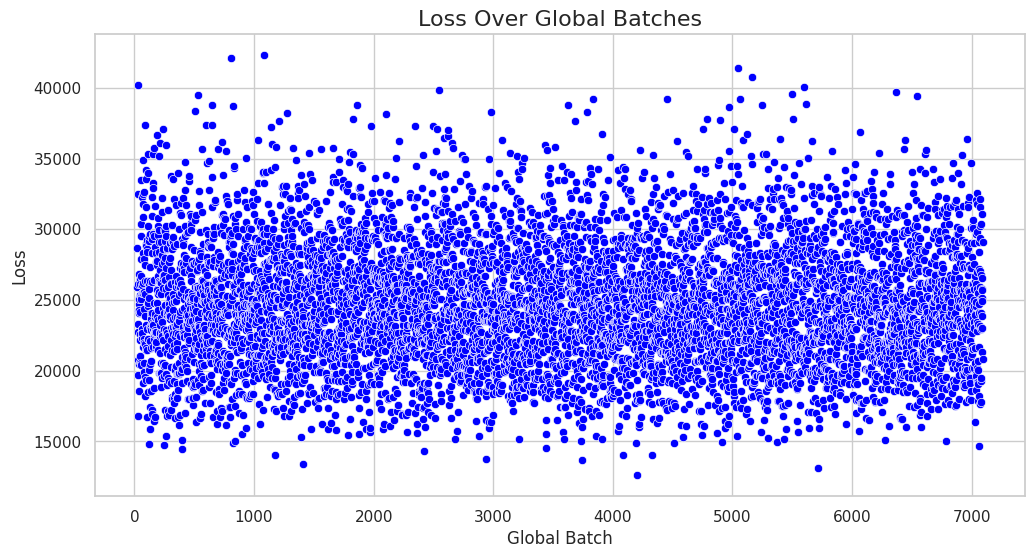

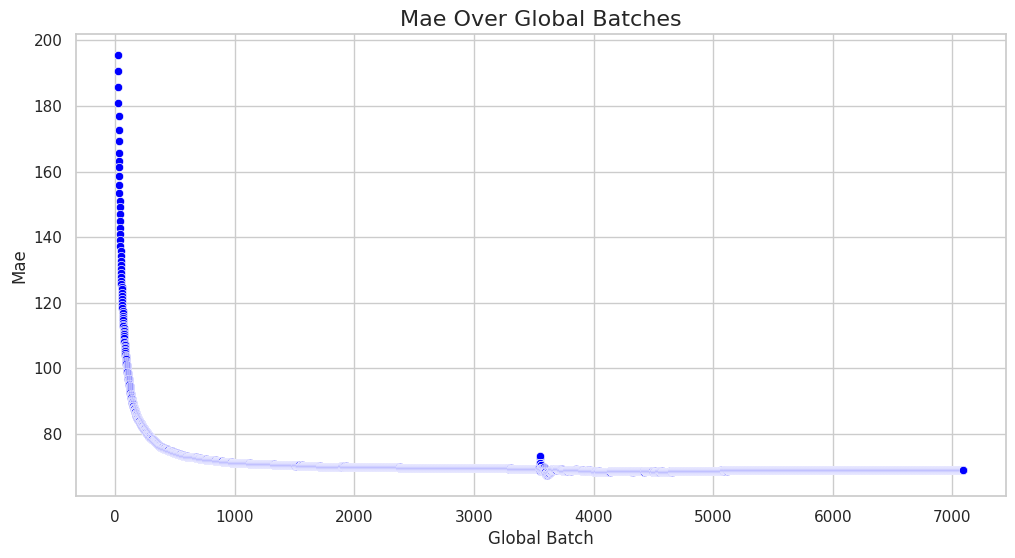

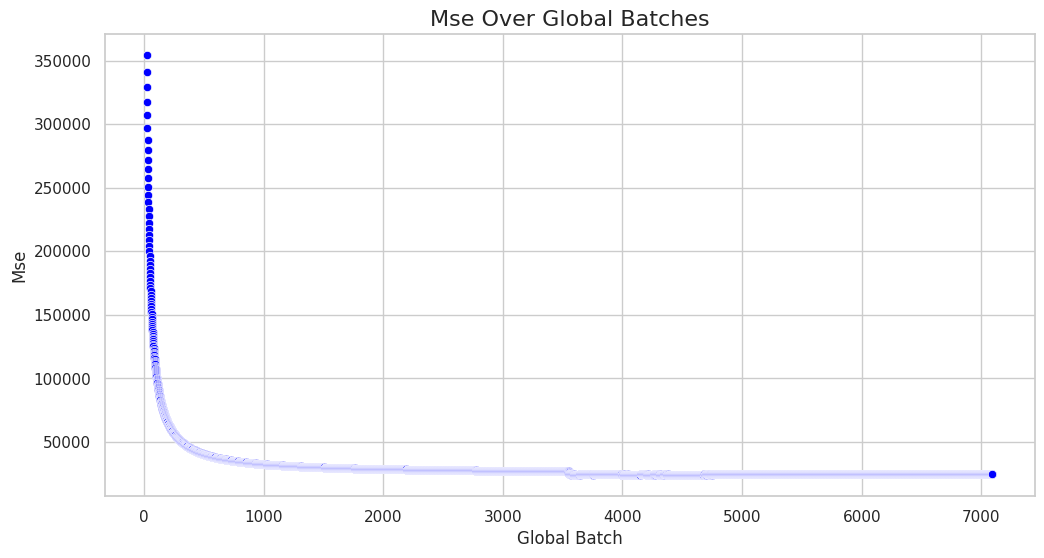

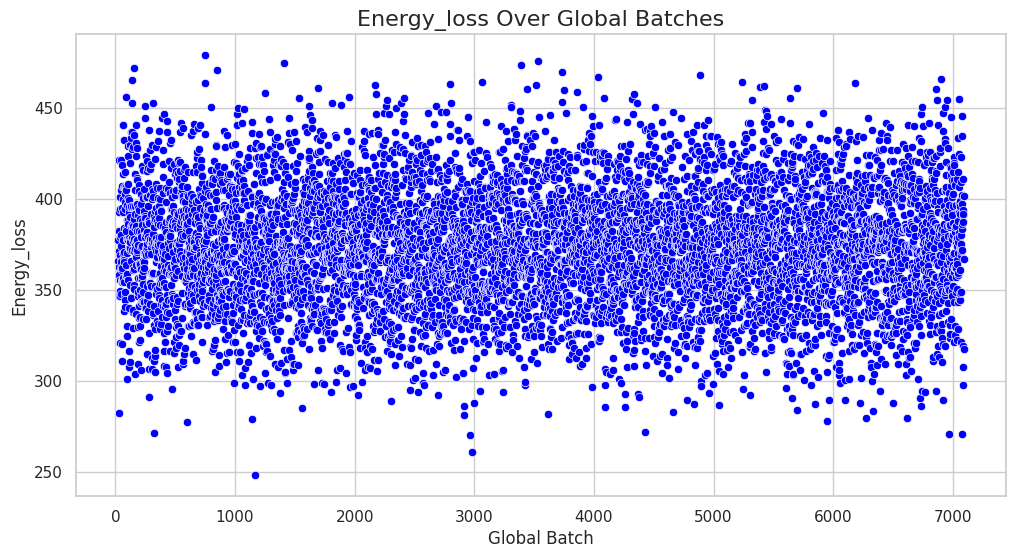

In [20]:
# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Plot metrics against the global batch index
metrics = ['loss', 'mae', 'mse', 'energy_loss']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue")
    plt.title(f"{metric.capitalize()} Over Global Batches", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.show()


# lambda 0.5

,epoch,batch,loss,mae,mse,energy_loss
0,1,1,2.803667e+05,414.800476,280324.625,420.462860
1,1,2,2.555406e+06,660.594971,1417848.750,334.379150
2,1,3,4.737592e+06,911.632996,2524420.250,280.882690
3,1,4,2.757709e+04,702.057739,1900200.500,361.963318
4,1,5,3.370161e+04,585.262573,1526893.500,361.693787


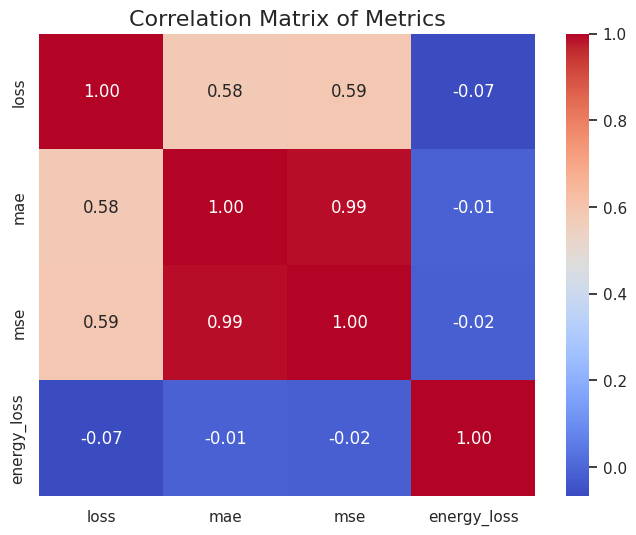

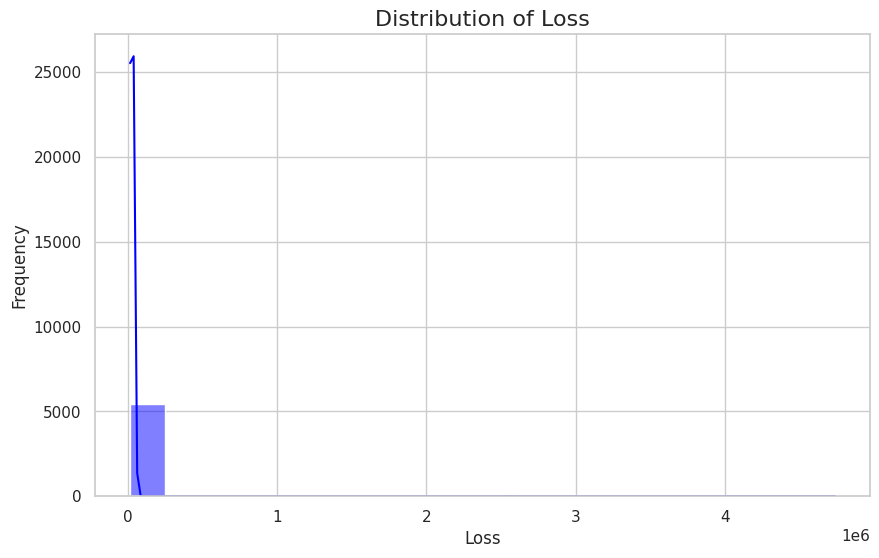

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.001/batch_train_log_lambda_0.5_datafrac_0.001.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_train_log_lambda_0.0_datafrac_0.1.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.0_datafrac_0.1.csv"
# filepath = "/home/alvarovh/code/cse598_climate_proj/results/results_0.1/batch_val_log_lambda_0.5_datafrac_0.1.csv"

data = pd.read_csv(filepath)

# Check the first few rows of the dataset
display(data.head())

# Set the style for the plots
sns.set(style="whitegrid")


# Heatmap to visualize the correlation between variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[["loss", "mae", "mse", "energy_loss"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metrics", fontsize=16)
plt.show()

# Histogram of Loss values
plt.figure(figsize=(10, 6))
sns.histplot(data["loss"], kde=True, color="blue", bins=20)
plt.title("Distribution of Loss", fontsize=16)
plt.xlabel("Loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


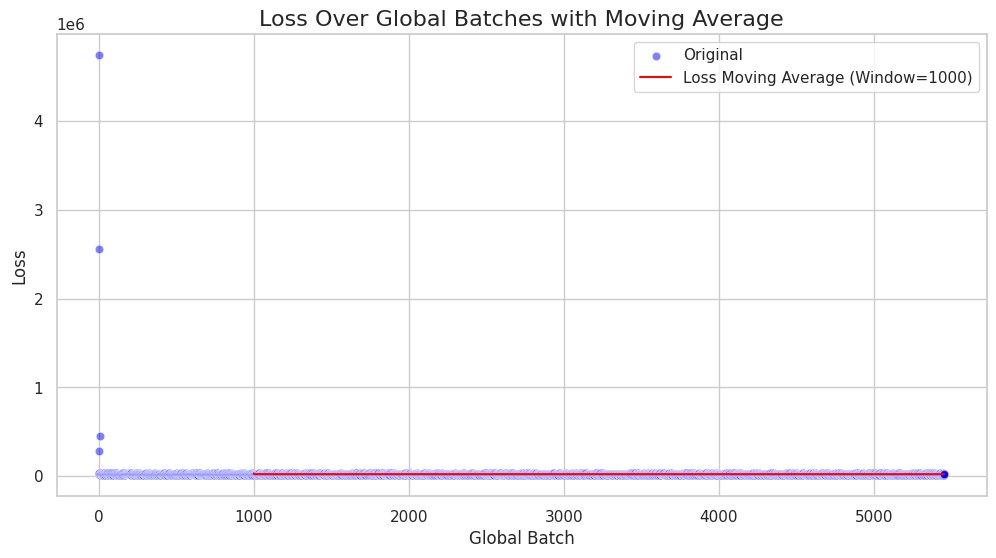

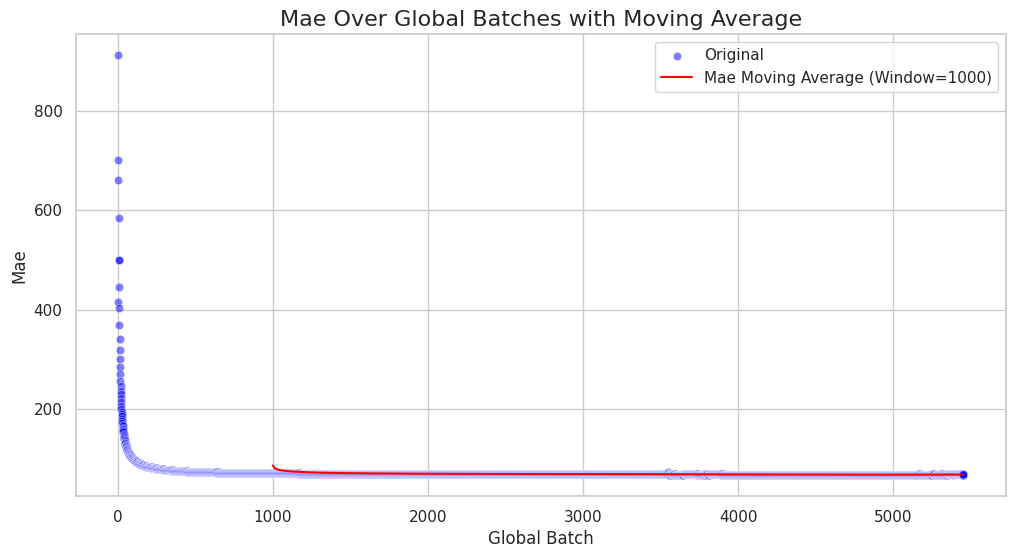

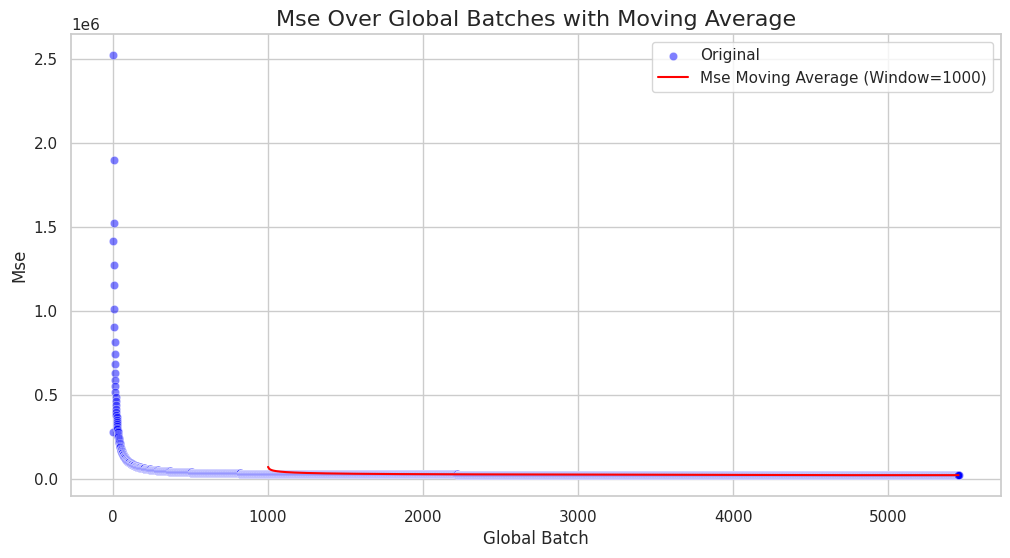

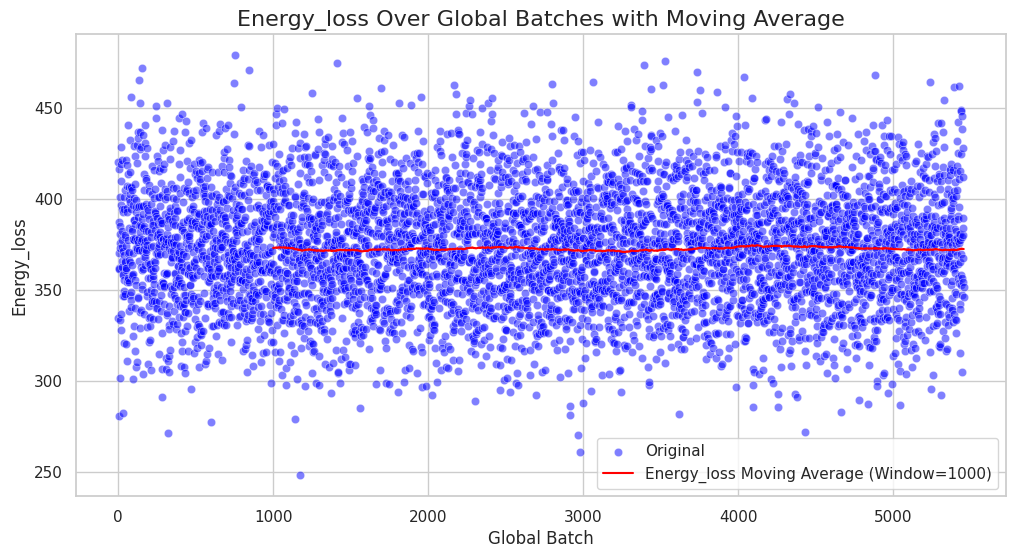

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `data` is a pandas DataFrame with 'epoch', 'batch', and the metrics columns like 'loss', 'mae', 'mse', 'energy_loss'

# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Define the metrics to plot
metrics = ['loss', 'mae', 'mse', 'energy_loss']
window_size = 1000  # Define the window size for the moving average

# Loop through each metric and plot with moving average
for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    # Compute the moving average for the metric with the rolling window
    data[f'{metric}_moving_avg'] = data[metric].rolling(window=window_size).mean()
    
    # Plot the original data (scatter)
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue", alpha=0.5, label='Original')
    
    # Plot the moving average (line)
    sns.lineplot(x="global_batch", y=f'{metric}_moving_avg', data=data, color="red", label=f'{metric.capitalize()} Moving Average (Window={window_size})')

    # Add title and labels
    plt.title(f"{metric.capitalize()} Over Global Batches with Moving Average", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()


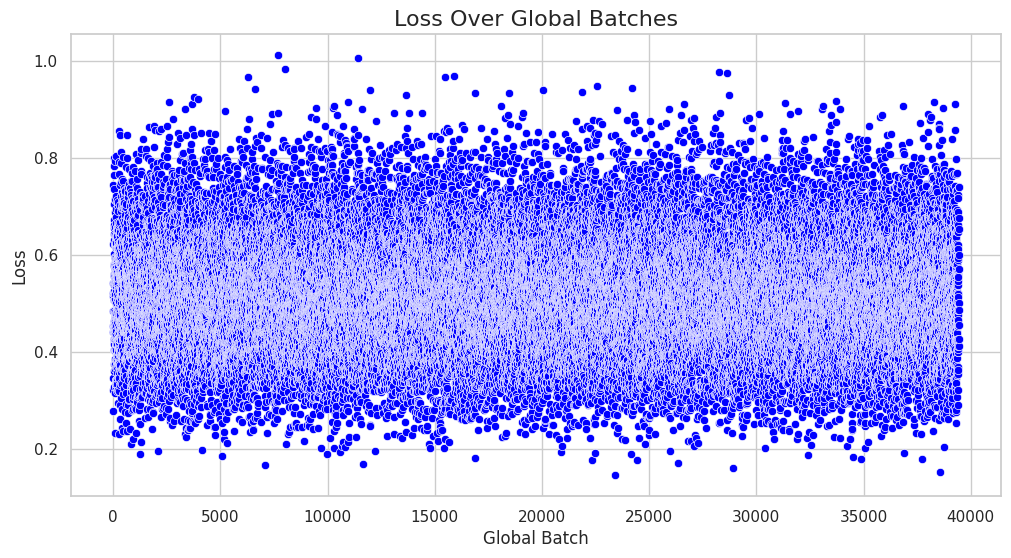

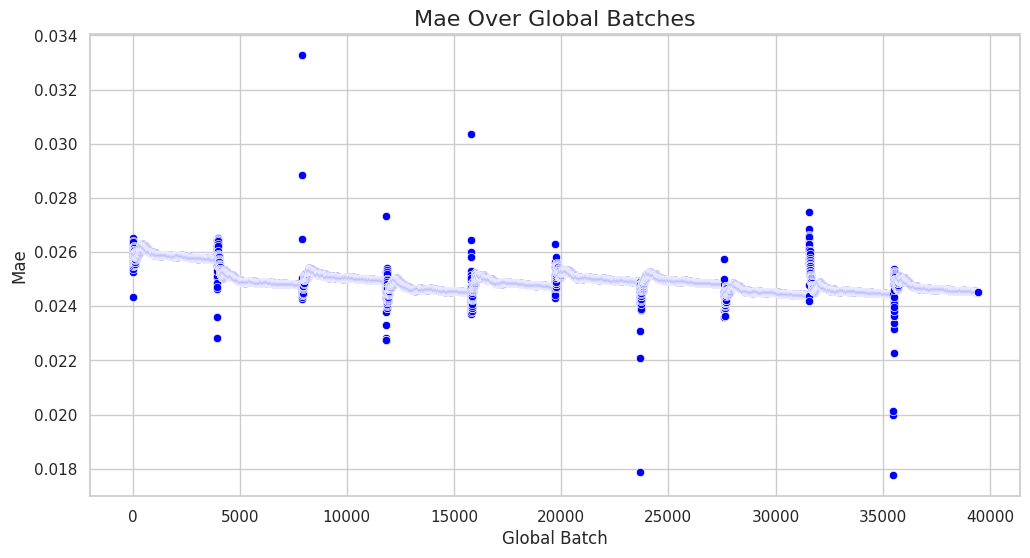

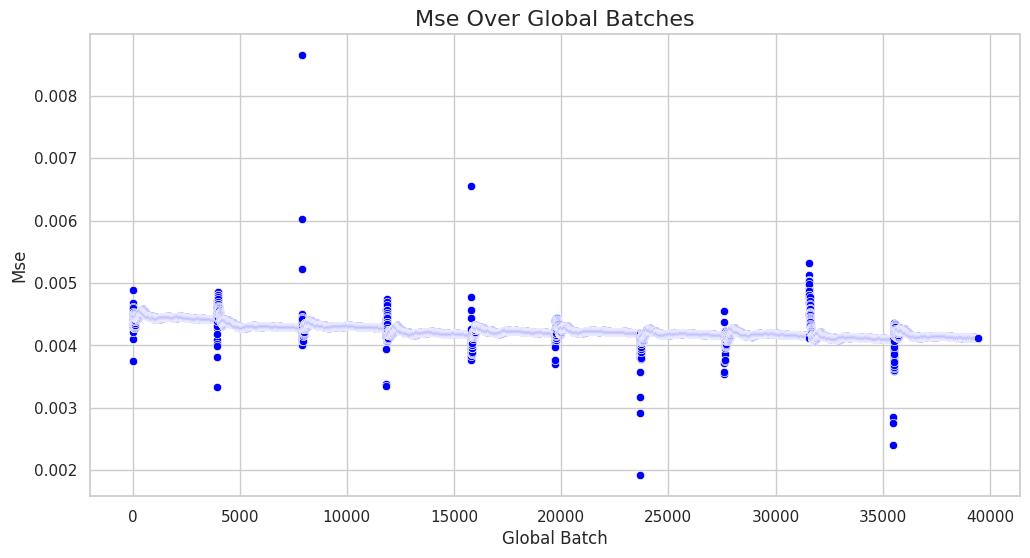

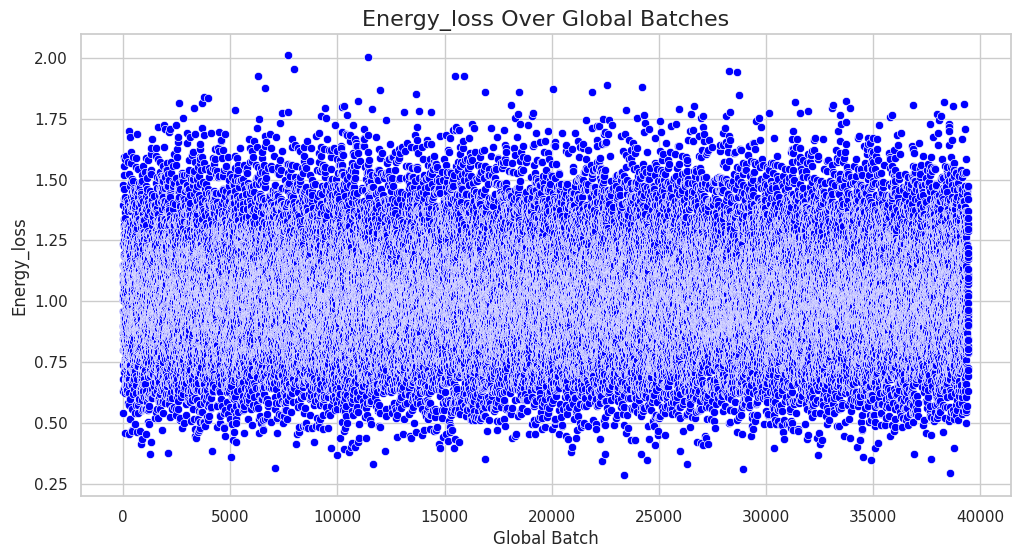

In [9]:
# Create a global batch index
data['global_batch'] = (data['epoch'] - 1) * data['batch'].max() + data['batch']

# Plot metrics against the global batch index
metrics = ['loss', 'mae', 'mse', 'energy_loss']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="global_batch", y=metric, data=data, marker="o", color="blue")
    plt.title(f"{metric.capitalize()} Over Global Batches", fontsize=16)
    plt.xlabel("Global Batch", fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.show()


# Plot per metric

In [14]:
data

,epoch,batch,loss,mae,mse,energy_loss


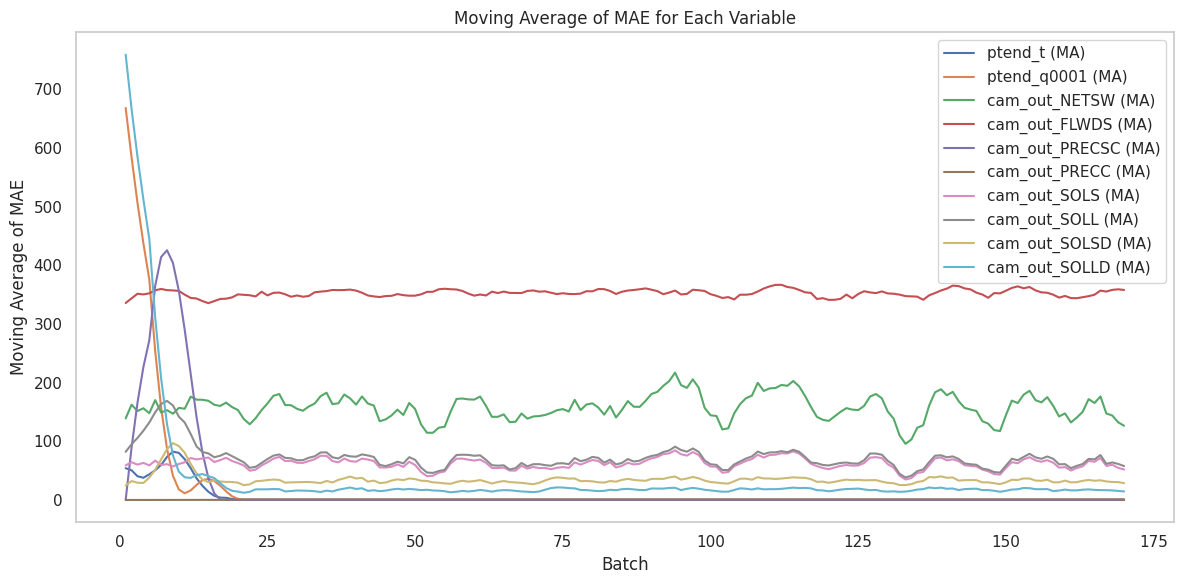

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/alvarovh/code/cse598_climate_proj/climate-physicsML/final_combined_loss_model/output_batch_size_32_learning_rate_0.00001_lambda_0.0/results_0.01/train_variable_metrics_lambda_0.0_datafrac_0.01.csv"  # Replace with the correct path to your file

data = pd.read_csv(file_path)

# Calculate the moving average
window_size = 5  # Adjust the window size for the moving average
data['mae_moving_avg'] = data.groupby('variable_name')['mae'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plot each variable's moving average
plt.figure(figsize=(12, 6))
for variable in data['variable_name'].unique():
    subset = data[data['variable_name'] == variable]
    plt.plot(subset['batch'], subset['mae_moving_avg'], label=f"{variable} (MA)")

# Customize the plot
plt.title("Moving Average of MAE for Each Variable")
plt.xlabel("Batch")
plt.ylabel("Moving Average of MAE")
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


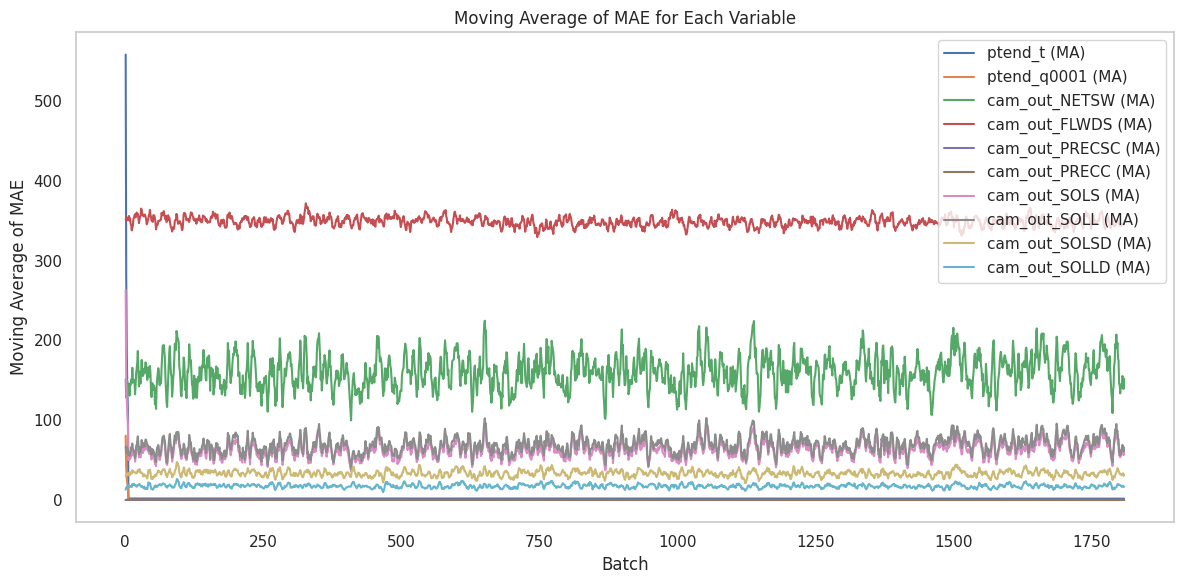

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/alvarovh/code/cse598_climate_proj/results/results_0.01/train_variable_metrics_lambda_0.1_datafrac_0.01.csv"  # Replace with the correct path to your file

data = pd.read_csv(file_path)

# Calculate the moving average
window_size = 5  # Adjust the window size for the moving average
data['mae_moving_avg'] = data.groupby('variable_name')['mae'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plot each variable's moving average
plt.figure(figsize=(12, 6))
for variable in data['variable_name'].unique():
    subset = data[data['variable_name'] == variable]
    plt.plot(subset['batch'], subset['mae_moving_avg'], label=f"{variable} (MA)")

# Customize the plot
plt.title("Moving Average of MAE for Each Variable")
plt.xlabel("Batch")
plt.ylabel("Moving Average of MAE")
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


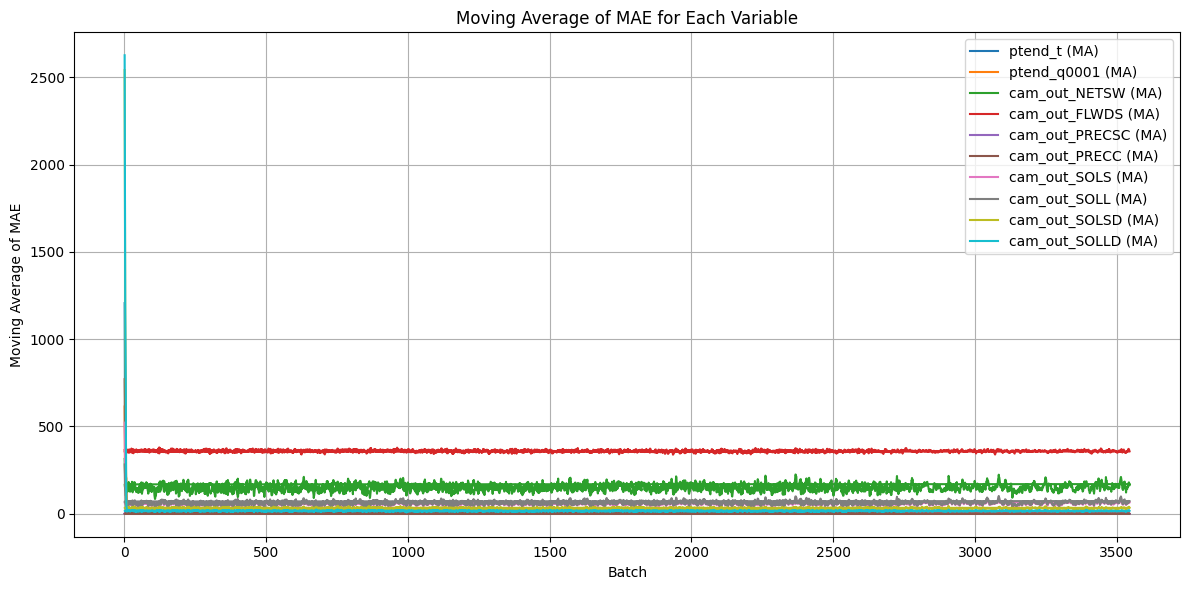

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/home/alvarovh/code/cse598_climate_proj/results/results_0.01/train_variable_metrics_lambda_0.1_datafrac_0.01.csv"  # Replace with the correct path to your file

data = pd.read_csv(file_path)

# Calculate the moving average
window_size = 5  # Adjust the window size for the moving average
data['mae_moving_avg'] = data.groupby('variable_name')['mae'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plot each variable's moving average
plt.figure(figsize=(12, 6))
for variable in data['variable_name'].unique():
    subset = data[data['variable_name'] == variable]
    plt.plot(subset['batch'], subset['mae_moving_avg'], label=f"{variable} (MA)")

# Customize the plot
plt.title("Moving Average of MAE for Each Variable")
plt.xlabel("Batch")
plt.ylabel("Moving Average of MAE")
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
data

,epoch,batch,variable_name,mae,mse,mae_moving_avg
